In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

import numpy as np
from pandas import *
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from os import path

In [2]:
csv_array = pd.read_csv('./dataset/label.csv')
#csv_array.columns
#csv_array.file_name
#csv_array.label
dir_image = "./dataset/image/"
dir_small_img = "./dataset/small_img/"
dir_img256 = "./dataset/image256/"

if path.exists(dir_small_img) == 'false':
    os.makedirs(dir_small_img)
if path.exists(dir_img256) == 'false':
    os.makedirs(dir_img256)

In [4]:
#rows, cols = (3000, 16384)             #rows is data set size; cols is width*length (after image size reduction. Here is 128*128)
#rows, cols = (3000, 65536)             #256*256
#rows, cols = (3000, 262144)             #512*512 
#num_imgs,height,width = (3000, 128, 128)
#num_imgs,height,width = (300, 512, 512)
num_imgs,height,width = (3000, 256, 256)
#imgs = [[0 for i in range(cols)] for j in range(rows)]     #Initialize an array for all reduced images
#imgs = np.zeros((rows,cols))
imgs = np.zeros((num_imgs,height,width,3))
labels = np.zeros((num_imgs,1))

#from PIL import Image                 #Import PIL for image size reduction

#basewidth = 256                       #Target image width; original width is 512
#img = Image.open("/Users/kuiwang/Documents/Applied ML Systems/FinalAssignment/dataset/image/IMAGE_0000.jpg")
#wpercent = float(basewidth) / float(img.size[0])
#hsize = int((float(img.size[1]) * float(wpercent)))    #calculated target image height

#for i in range(rows):                 #Reduce every image's size and save them in 'small_img' folder
#    img = Image.open(dir_image + csv_array.file_name[i])
#    img = img.resize((basewidth, hsize), Image.ANTIALIAS)
#    img.save(dir_img256 + csv_array.file_name[i])

#for i in range(rows):                 #Read every small image and reduce it from RGB to grayscale format. Transform it to 1-d array. Store all images in 2-d array imgs. 
#    img = mpimg.imread(dir_small_img + csv_array.file_name[i])[...,0]
#    img = mpimg.imread(dir_img256 + csv_array.file_name[i])[...,0]
#    img = mpimg.imread(dir_image + csv_array.file_name[i])[...,0]
#    imgs[i] = img.flatten() 
#print(imgs.shape)

for i in range(num_imgs):
    #imgs[i] = mpimg.imread(dir_image + csv_array.file_name[i])
    imgs[i] = mpimg.imread(dir_img256 + csv_array.file_name[i])
    #imgs[i] = mpimg.imread(dir_small_img + csv_array.file_name[i])
print(imgs.shape)

train_images = imgs[0:2700]
test_images = imgs[2700:3000]
print(train_images.shape)
print(test_images.shape)

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

for i in range(3000):
    if csv_array.label[i] == 'no_tumor':
        labels[i][0] = 0
    if csv_array.label[i] == 'meningioma_tumor':
        labels[i][0] = 1
    if csv_array.label[i] == 'glioma_tumor':
        labels[i][0] = 2
    if csv_array.label[i] == 'pituitary_tumor':
        labels[i][0] = 3

train_labels = labels[0:2700]
print(train_labels.shape)
test_labels = labels[2700:3000]

(3000, 256, 256, 3)
(2700, 256, 256)
(300, 256, 256)
(2700, 1)


/Users/kuiwang/opt/anaconda3/envs/tf/lib/python3.7/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


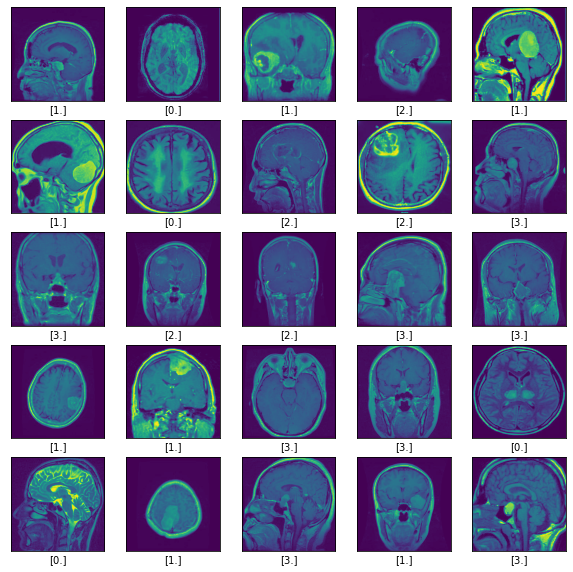

In [4]:
#class_names = ['no_tumor', 'meningioma_tumor', 'glioma_tumor', 'pituitary_tumor']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(train_labels[i])
plt.show()

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

2021-12-11 20:19:54.048221: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-11 20:19:54.049575: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 64)        36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 230400)            0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

train_images = np.asarray(train_images)
train_labels = np.asarray(train_labels)
test_images = np.asarray(test_images)
test_labels = np.asarray(test_labels)

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

ValueError: Error when checking input: expected conv2d_1_input to have 4 dimensions, but got array with shape (2700, 256, 256)

300/1 - 26s - loss: 0.2985 - accuracy: 0.9400


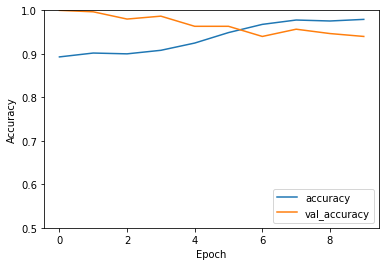

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)